# Neuron-Forest Fire (Name subject to change)
#### (Built under Python 3.11.4)
#### (By: Mark Ehab Aziz)

Project will be done to build and train a neural network using \<insert library name\>.

So far no idea about anything, will be looking to fix that xd.

In [1]:
# Importing Libraries
import pandas as pd                     # Dataframe operations and input
import numpy as np                      # Numerical operations, Linear Alg
import seaborn as sns                   # Visualising
from matplotlib import pyplot as plt    # Big Visualisation core

In [2]:
# Loading Data
# 1 - Path to Different Folder (I'm using within my Repo)
fire_data = pd.read_csv("../dataset/forestfires.csv")

# 2 - Same-File load
#fire_data = pd.read_csv("./forestfires.csv")

# Data Exploration
Taking a look around the rows and columns, whilst writing some definitions here to explain each column.

## Column Descriptions
- X: Spatial Data Coord for "Montesinho Park" map ranging from $1$ to $9$.
- Y: Spatial Data Coord for "Montesinho Park" map ranging from $2$ to $9$.
- month: Month of the year. ['January' $\rightarrow$ 'December]
- day: Day of the week.
- FFMC: Fine Fuel Moisture Code; represents fuel moisture of forest litter fuels under the shade of a forest canopy.\
        It is intended to represent moisture conditions for shaded litter fuels, the equivalent of 16-hour timelag. It ranges from 0-101.
 
- DMC: The Duff Moisture Code; represents fuel moisture of decomposed organic material underneath the litter.\
        System designers suggest that it is represents moisture conditions for the equivalent of 15-day (or 360 hr) timelag fuels. It is unitless and open ended. 
- DC: Drought Code; represents drying deep into the soil. It approximates moisture conditions for the equivalent of 53-day timelag fuels.\
      It is unitless, with a maximum value of 1000.
- ISI: Initial Spread Index; It integrates fuel moisture for fine dead fuels and surface windspeed to estimate a spread potential.\
        ISI is a key input for fire behavior predictions in the FBP system.
- temp: Temperature in Celsius.
- RH: Relative Humidity in $%$.
- wind: Wind Speed in $km/h$.
- rain: Outside Rain in $mm/m^2$.
- area: Burnt Area in forest in hectares.

In [3]:
# Defining n
n = 5

# Getting first/last n rows
display(fire_data.head(), fire_data.tail())

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [4]:
# Displaying general information
fire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


There seems to be no missing data.

In [5]:
# Statistical measurements
fire_data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


There seems to be little to no outliers.\
Will be revealed with plots

Text(0.5, 1.0, 'Area')

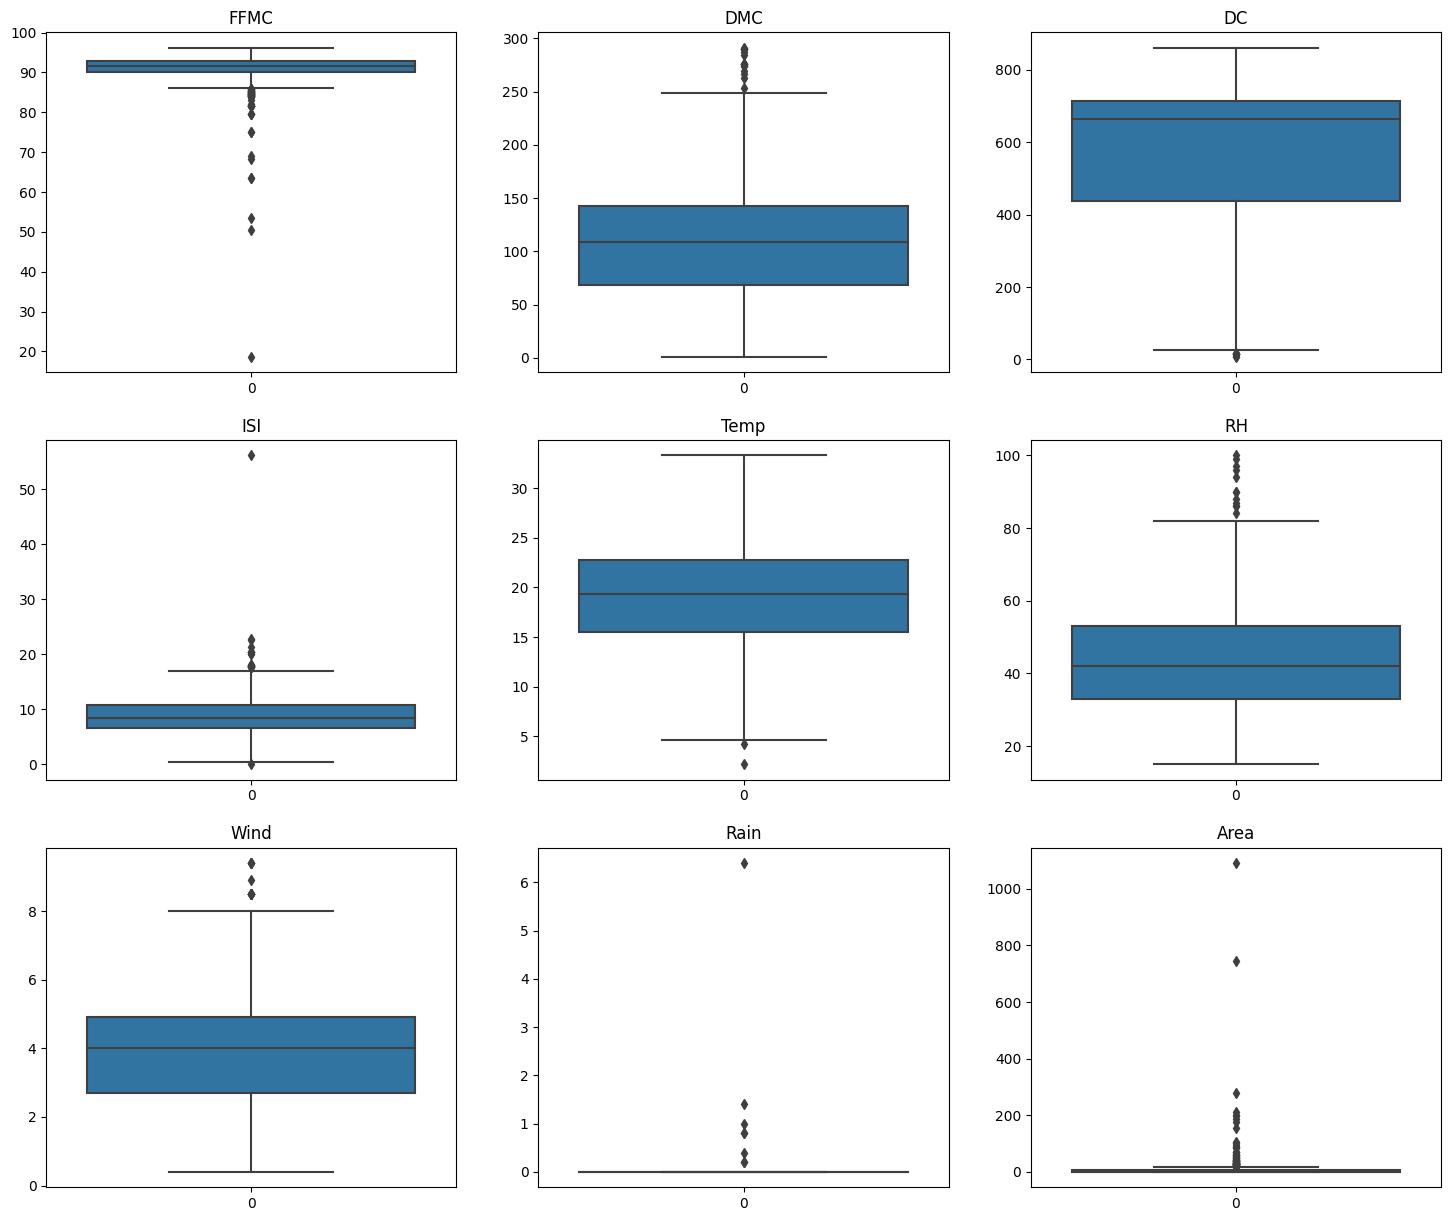

In [6]:
# Plotting multiple boxplots within the same figure
fig, axes = plt.subplots(3, 3, figsize = (18, 15))

sns.boxplot(ax = axes[0, 0], data = fire_data['FFMC']).set_title('FFMC')
sns.boxplot(ax = axes[0, 1], data = fire_data['DMC']).set_title('DMC')
sns.boxplot(ax = axes[0, 2], data = fire_data['DC']).set_title('DC')
sns.boxplot(ax = axes[1, 0], data = fire_data['ISI']).set_title('ISI')
sns.boxplot(ax = axes[1, 1], data = fire_data['temp']).set_title('Temp')
sns.boxplot(ax = axes[1, 2], data = fire_data['RH']).set_title('RH')
sns.boxplot(ax = axes[2, 0], data = fire_data['wind']).set_title('Wind')
sns.boxplot(ax = axes[2, 1], data = fire_data['rain']).set_title('Rain')
sns.boxplot(ax = axes[2, 2], data = fire_data['area']).set_title('Area')


As expected, there are drastic outliers in specific columns, namely:
- FFMC
- ISI
- Rain
- Area

<Axes: xlabel='X', ylabel='Y'>

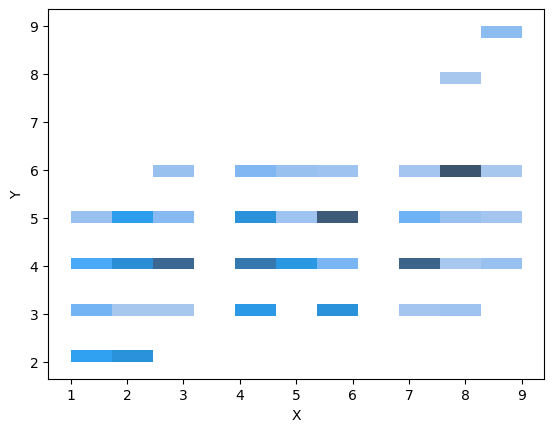

In [7]:
# Visualising the map because I'm curious
sns.histplot(x = fire_data['X'], y = fire_data['Y'])

# Preprocessing
Flipping categorical values to OneHotEncoder encoded values.

In [8]:
# Creating onh encoded columns using pandas' get_dummies() method
# specifying the column, the prefix for output, and separator -> month_<col_value>
# dtype to be int to have it as 1/0

# Encoded column for Months
onh_month = pd.get_dummies(fire_data['month'], prefix = 'month', prefix_sep = '_', dtype = int)

# Encoded column for Days
onh_day = pd.get_dummies(fire_data['day'], prefix = 'day', prefix_sep = '_', dtype = int)

# Concatenating columns to original frame
encoded_fire = pd.concat([fire_data, onh_month, onh_day], axis = 1).copy(deep = True)

encoded_fire

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,...,0,0,0,1,0,0,0,0,0,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,...,0,1,0,0,0,0,0,0,1,0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,...,0,1,0,0,0,1,0,0,0,0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,...,0,0,0,1,0,0,0,0,0,0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,...,0,0,0,0,0,0,1,0,0,0
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,...,0,0,0,0,0,0,1,0,0,0
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,...,0,0,0,0,0,0,1,0,0,0
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,...,0,0,0,0,0,1,0,0,0,0


<Axes: xlabel='month', ylabel='Count'>

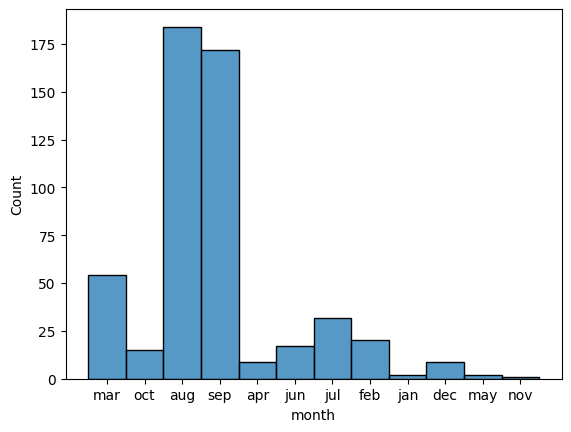

In [9]:
# Visualising months when fires would be most occuring
sns.histplot(encoded_fire['month'])

We can see that the majority of fires take place during August and Septembre.

In [10]:
# dropping encoded columns
encoded_fire = encoded_fire.drop(['month', 'day'], axis = 1)

encoded_fire

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,1,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,1,0,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,1,0,0,0
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,1,0,0,0
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,1,0,0,0
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,1,0,0,0,0


In [11]:
# Might try adding more noise
# Known as Data Augmentation, More values the better
def add_rnd_noise(data, noisecoef = 0.01):
    return data + np.random.normal(0, noisecoef, data.shape)

noisy_dat = add_rnd_noise(encoded_fire)

encoded_fire = pd.concat([encoded_fire, noisy_dat], axis = 0)

In [12]:
# Needing to scale the area (Logarithmically)
encoded_fire['area'] = encoded_fire['area'] * 10000
encoded_fire['area'] = np.where(encoded_fire['area'] <= 0.1, encoded_fire['area'] + (10 ** -6), abs(np.log1p(encoded_fire['area'])))
encoded_fire['area'].describe()

c:\Users\marke\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    1034.000000
mean       -4.807784
std        39.024750
min      -293.123057
25%         0.000001
50%         8.575473
75%        11.093825
max        16.205047
Name: area, dtype: float64

In [13]:
encoded_fire['area'] = np.where(encoded_fire['area'] <= 2.5, 0, 1)
encoded_fire['area'].describe()

count    1034.000000
mean        0.624758
std         0.484420
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: area, dtype: float64

In [14]:
# Normalising values
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()

encoded_fire.iloc[:, :9] = std_scale.fit_transform(encoded_fire.iloc[:, :9])

encoded_fire.iloc[:, 11:] = encoded_fire.iloc[:, 11:].astype(int)

# Column Selection
Considering we want to predict the Coordinates of the fire, we'll split the data into 2:
- Area.
- Climate Data.

In [15]:
# Splitting Data into input/output
area = encoded_fire.loc[:, 'area']

atm_date = encoded_fire.drop(columns=['rain', 'area'])

area.describe()

count    1034.000000
mean        0.624758
std         0.484420
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: area, dtype: float64

In [16]:
# Importing Keras' NN Modules
import keras.optimizers as koptim               # Optimisers package, tweak learning rate
from keras.callbacks import EarlyStopping       # Stopping Network Training
from keras.layers import Dense                  # Neuron Layers (In, Hidden, Out)
from keras.models import Sequential             # Sequential Model

In [17]:
# Assigning a name to model
area_predict = Sequential(name = 'Area_Size')

# Adding layers
area_predict.add(Dense(30, input_shape = (atm_date.shape[1], )))
area_predict.add(Dense(35, activation = 'relu'))
area_predict.add(Dense(35, activation = 'relu'))
area_predict.add(Dense(35, activation = 'relu'))
area_predict.add(Dense(1))

In [18]:
# Tweaking Learning Rate
from keras import backend as K
cust_optim = koptim.Adam(learning_rate = 0.00097)

In [19]:
# Setting: Loss Function, Optimizer, and Metrics
area_predict.compile(loss = 'mean_squared_error', optimizer = cust_optim, metrics=['mse', 'mae', 'accuracy'])
area_predict.summary()

Model: "Area_Size"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                870       
                                                                 
 dense_1 (Dense)             (None, 35)                1085      
                                                                 
 dense_2 (Dense)             (None, 35)                1260      
                                                                 
 dense_3 (Dense)             (None, 35)                1260      
                                                                 
 dense_4 (Dense)             (None, 1)                 36        
                                                                 
Total params: 4511 (17.62 KB)
Trainable params: 4511 (17.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# Implementing Early stopping with Keras'
# Setting it to monitor "Validation Loss"
# Minimizing Loss
# Verbose set to 1 to give the epoch
# Adding a delay to stopping, in case of improvement
stopper = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)

In [21]:
# Storing training history over epochs
# Fingers crossed compooter no go boom
progress = area_predict.fit(atm_date, area, validation_split = 0.37, epochs = 70, batch_size = 35, callbacks = [stopper])

Epoch 1/70
19/19 [==============================] - 2s 17ms/step - loss: 0.4107 - mse: 0.4107 - mae: 0.5326 - accuracy: 0.4869 - val_loss: 0.3127 - val_mse: 0.3127 - val_mae: 0.5267 - val_accuracy: 0.3969
Epoch 2/70
19/19 [==============================] - 0s 4ms/step - loss: 0.2733 - mse: 0.2733 - mae: 0.4940 - accuracy: 0.5054 - val_loss: 0.2745 - val_mse: 0.2745 - val_mae: 0.4991 - val_accuracy: 0.4543
Epoch 3/70
19/19 [==============================] - 0s 4ms/step - loss: 0.2504 - mse: 0.2504 - mae: 0.4794 - accuracy: 0.5530 - val_loss: 0.2711 - val_mse: 0.2711 - val_mae: 0.5007 - val_accuracy: 0.4621
Epoch 4/70
19/19 [==============================] - 0s 4ms/step - loss: 0.2382 - mse: 0.2382 - mae: 0.4696 - accuracy: 0.5730 - val_loss: 0.2469 - val_mse: 0.2469 - val_mae: 0.4745 - val_accuracy: 0.5587
Epoch 5/70
19/19 [==============================] - 0s 4ms/step - loss: 0.2275 - mse: 0.2275 - mae: 0.4575 - accuracy: 0.6098 - val_loss: 0.2510 - val_mse: 0.2510 - val_mae: 0.4785 - 

In [22]:
# Evaluating Model Scores
area_predict.evaluate(atm_date, area)

33/33 [==============================] - 0s 2ms/step - loss: 0.1520 - mse: 0.1520 - mae: 0.3347 - accuracy: 0.8046


[0.15195688605308533,
 0.15195688605308533,
 0.3346538841724396,
 0.8046421408653259]

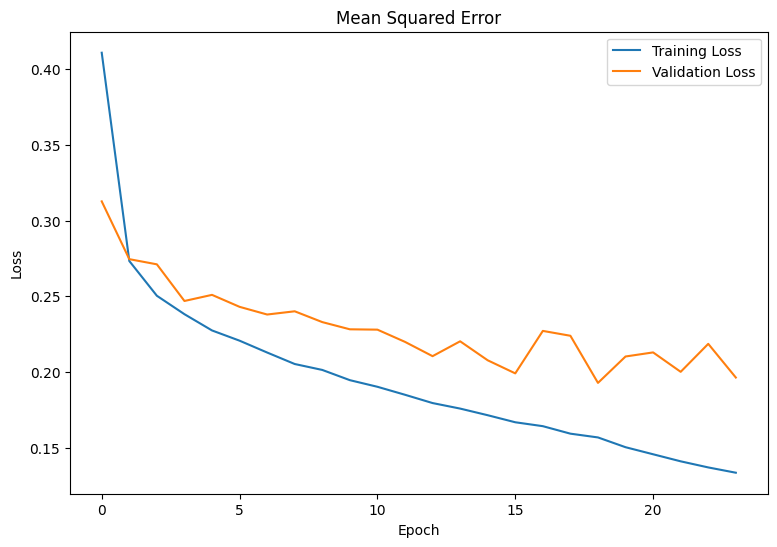

In [23]:
# Visualizing the rates and keys
# Doing this for the sake of the report
# Plot training history
plt.figure(figsize = (9, 6))

# Plot training & validation loss values
plt.plot(progress.history['loss'], label = 'Training Loss')
plt.plot(progress.history['val_loss'], label = 'Validation Loss')
plt.title('Mean Squared Error')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

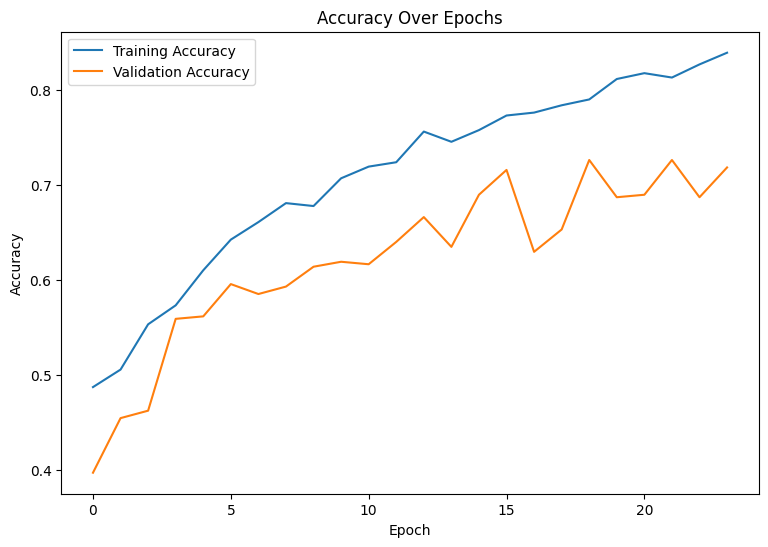

In [25]:
# Visualizing the rates and keys
# Doing this for the sake of the report
# Plot training history
plt.figure(figsize = (9, 6))

# Plot training & validation loss values
plt.plot(progress.history['accuracy'], label = 'Training Accuracy')
plt.plot(progress.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()